In [1]:
import sys
sys.path.insert(0,'../src/')

from utils import *
from multiply_connected_pipe import *

from matplotlib import pyplot as plt
import numpy as np
import pickle

In [2]:
with open('global_pipe_fmm_solve.pickle','rb') as f:
    fmm_solve = pickle.load(f)

In [3]:
xs = fmm_solve.xs
ys = fmm_solve.ys
z = xs + 1j*ys
omega = fmm_solve.omegas[0]
[p._build() for p in fmm_solve.panels];

In [4]:
d_phi_correction_term = fmm_solve.mat_vec.d_phi_correction_term(z,omega)

/Users/haiy/proj/stokes2d/exp3/../src/curve/panel.py:247: RuntimeWarning: divide by zero encountered in log
  return (1j*psi + np.log((1-targ_norm)/((-1-targ_norm)*np.exp(1j*psi))))
/Users/haiy/proj/stokes2d/exp3/../src/curve/panel.py:215: RuntimeWarning: invalid value encountered in multiply
  P[near,k+1] = P[near, k] * targ_norm[near] + (1 - (-1)**k)/(k)
/Users/haiy/proj/stokes2d/exp3/../src/curve/panel.py:221: RuntimeWarning: divide by zero encountered in divide
  R[:,k] = (k-1)*P[:,k-1] + (-1)**k/(1+targ_norm) - 1/(1-targ_norm)
/Users/haiy/proj/stokes2d/exp3/../src/curve/panel.py:221: RuntimeWarning: invalid value encountered in divide
  R[:,k] = (k-1)*P[:,k-1] + (-1)**k/(1+targ_norm) - 1/(1-targ_norm)
/Users/haiy/proj/stokes2d/exp3/../src/curve/panel.py:221: RuntimeWarning: invalid value encountered in multiply
  R[:,k] = (k-1)*P[:,k-1] + (-1)**k/(1+targ_norm) - 1/(1-targ_norm)
/Users/haiy/proj/stokes2d/exp3/../src/curve/panel.py:225: RuntimeWarning: invalid value encountered in d

In [27]:
u, v, p, o = fmm_solve.fields_with_fluxes(np.array([1]),base_let_index=0,base_pressure=0)

In [33]:
np.sum(np.abs(p) > 1e4)

207

In [40]:
np.sum(np.abs(p + d_phi_correction_term.imag) > 1e4)

82

In [45]:
p_correct = p + np.imag(d_phi_correction_term)

p_correct[np.isnan(p_correct)] = 0
p_correct[np.abs(p_correct)>1e4] = 0
# o_correct = o + np.real(d_phi_correction_term)

In [47]:
fmm_solve.pressure_drops

array([[74.43036624]])

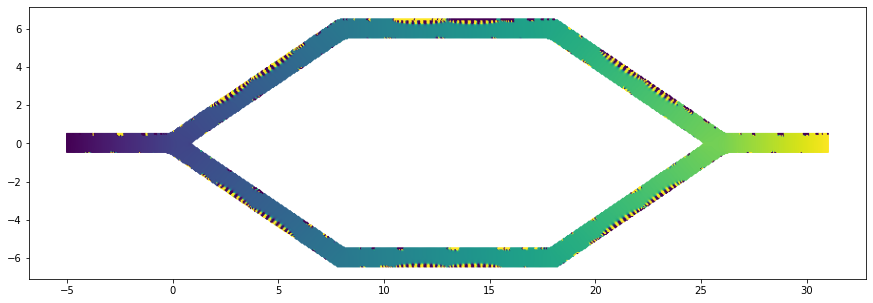

In [50]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(xs,ys,c=p_correct,s=1,vmin=0,vmax=75)

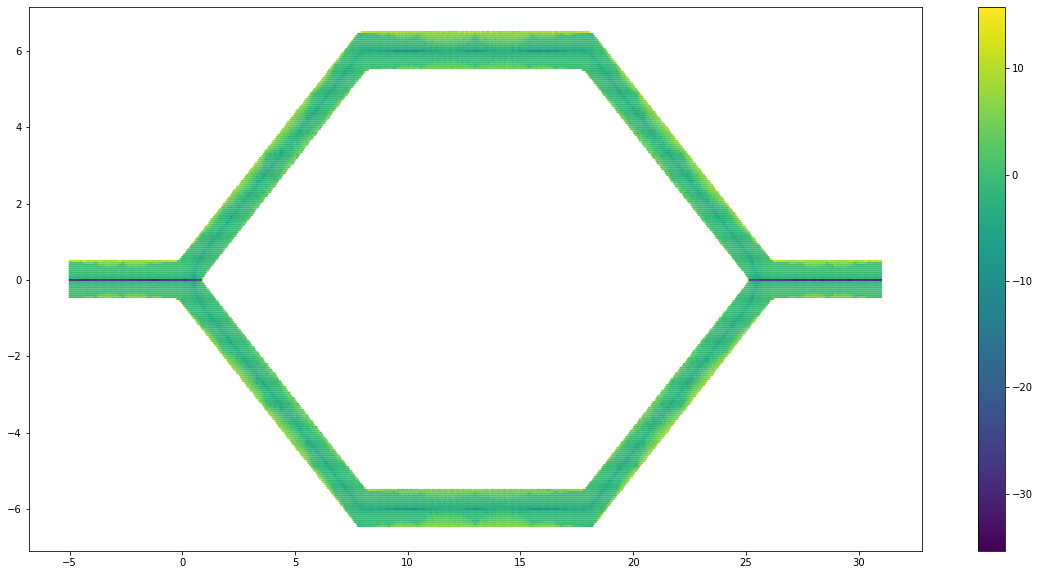

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
fig.colorbar(ax.scatter(xs,ys,c=np.log(np.abs(o)),s=1))

In [10]:
p = fmm_solve.panels[0]
target_indices = np.where(np.abs(z-p.start_pt) + np.abs(z-p.end_pt) <= 4*p.arclen)[0]

In [15]:
om = omega[0:p.n]
omi = p.omega_interp@om

In [12]:
a_fine, da_fine = gauss_quad_rule(p.m,domain=p.domain)

In [23]:
correction = np.zeros_like(z, dtype=np.complex128)
source_index_start = 0
source_index_end = p.n
t_minus_z = p.t[np.newaxis,:] - z[target_indices][:,np.newaxis]
naive_eval = np.sum(
    (omega[source_index_start:source_index_end]*p.dt)[np.newaxis,:]
    /(t_minus_z**2), 
    axis=1)/(2j*np.pi)
precise_eval = p.hadamard_integral(z[target_indices]) @ omega[source_index_start:source_index_end]
correction[target_indices] = precise_eval - naive_eval            

In [24]:
naive_eval

array([-1.57065495e+02-3.29491821e+01j, -4.63596723e+02+6.10364829e+01j,
       -8.55634477e+01+1.98573203e+02j,  1.18344796e+05+1.17825121e+05j,
        2.37120579e+02+2.34987915e+02j])

In [25]:
precise_eval

array([-1.57065495e+02-3.29491821e+01j, -4.63596723e+02+6.10364829e+01j,
       -8.55634477e+01+1.98573203e+02j, -4.72351553e+16-4.70385768e+16j,
        2.37120579e+02+2.34987915e+02j])